✅ Data loaded. Shape: (569, 30)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



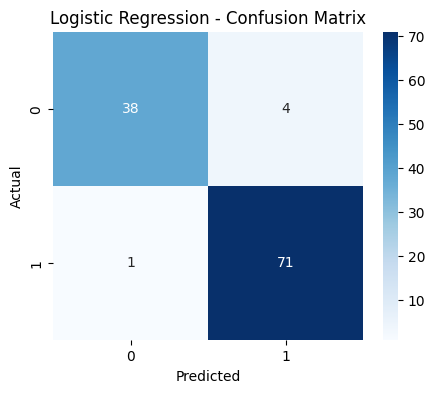


📌 Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.96      0.89      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



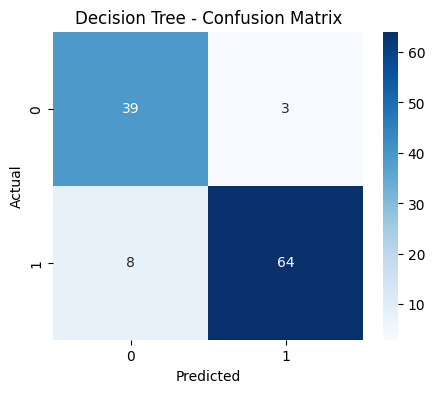


📌 Random Forest
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



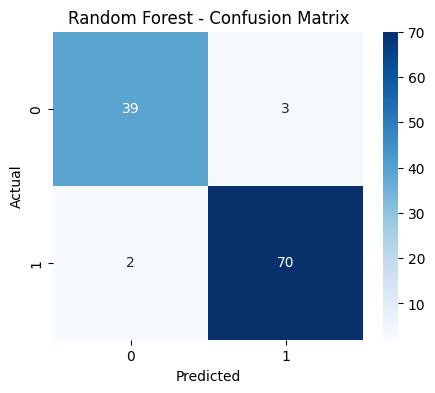

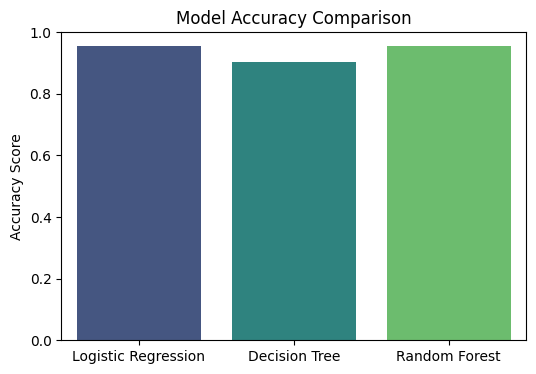

In [1]:
# 📌 Task 4: Model Comparison Pipeline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load data
data = load_breast_cancer()
X, y = data.data, data.target
print("✅ Data loaded. Shape:", X.shape)

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# 4. Train & evaluate
results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    # Print report
    print(f"\n📌 {name}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 5. Accuracy Comparison Graph
acc_df = pd.DataFrame({m: [results[m]["Accuracy"]] for m in models}).T
acc_df.columns = ["Accuracy"]

plt.figure(figsize=(6,4))
sns.barplot(x=acc_df.index, y="Accuracy", data=acc_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
plt.show()
